 ### Q1. Explain GET and POST methods.

**GET and POST are two of the most commonly used HTTP methods**, each serving a distinct purpose in web development:

1. **GET Method:**
   - **Purpose:** The GET method is used to request data from a specified resource.
   - **Data in URL:** Parameters and data are appended to the URL. For example, in a URL like `https://example.com/resource?param1=value1&param2=value2`, the parameters (`param1` and `param2`) are sent using the GET method.
   - **Visibility:** Since the data is included in the URL, it is visible to the user, and it appears in the browser's address bar.
   - **Caching:** GET requests can be cached by the browser, and they are idempotent, meaning making the same request multiple times produces the same result.

   Example in HTML form:
   ```html
   <form action="/submit" method="GET">
       <input type="text" name="username" />
       <input type="submit" value="Submit" />
   </form>
   ```

2. **POST Method:**
   - **Purpose:** The POST method is used to send data to be processed to a specified resource.
   - **Data in Request Body:** The data is sent in the body of the HTTP request, not in the URL. This makes it more secure compared to the GET method for sensitive information.
   - **Visibility:** Since the data is not in the URL, it is not visible in the browser's address bar.
   - **Caching:** POST requests are not cached by default, and they are not idempotent, meaning making the same request multiple times may produce different results.

   Example in HTML form:
   ```html
   <form action="/submit" method="POST">
       <input type="text" name="username" />
       <input type="submit" value="Submit" />
   </form>
   ```

**When to Use Each:**
- **Use GET when:**
  - You are requesting data from the server.
  - The request is idempotent (repeating the same request will not have different effects).
  - The data being sent is not sensitive.
  - Parameters can be visible in the URL.

- **Use POST when:**
  - You are submitting data to the server for processing.
  - The request is not idempotent (repeating the same request may have different effects).
  - The data being sent is sensitive (e.g., passwords, personal information).
  - The amount of data is large or contains binary data (file uploads).

In practice, web applications often use a combination of both GET and POST methods based on the requirements of the specific operation being performed. For example, retrieving a list of items may use GET, while submitting a form with user credentials may use POST for security reasons.

### Q2. Why is request used in Flask?

In Flask, the `request` object is used to access incoming request data in a Flask application. It provides a convenient way to interact with the data sent by a client (e.g., a web browser) in an HTTP request. The `request` object allows you to access parameters, form data, files, cookies, and more.

Here are some common use cases for the `request` object in Flask:

1. **Accessing Form Data:**
   - When a user submits an HTML form in a web application, the data from the form is sent to the server. The `request` object allows you to access this form data easily.

   ```python
   from flask import Flask, request

   app = Flask(__name__)

   @app.route('/submit', methods=['POST'])
   def submit_form():
       username = request.form.get('username')
       # Process the form data...
   ```

2. **Handling Query Parameters:**
   - When data is sent via the URL (e.g., in the query string), you can use the `request` object to access these parameters.

   ```python
   from flask import Flask, request

   app = Flask(__name__)

   @app.route('/search', methods=['GET'])
   def search():
       query = request.args.get('q')
       # Process the search query...
   ```

3. **Working with Cookies:**
   - The `request` object allows you to access and manipulate cookies sent by the client.

   ```python
   from flask import Flask, request

   app = Flask(__name__)

   @app.route('/')
   def index():
       username = request.cookies.get('username')
       # Process the username stored in the cookie...
   ```

4. **Handling File Uploads:**
   - When a form includes file uploads, the `request` object enables you to access and handle the uploaded files.

   ```python
   from flask import Flask, request

   app = Flask(__name__)

   @app.route('/upload', methods=['POST'])
   def upload_file():
       uploaded_file = request.files['file']
       # Process the uploaded file...
   ```

5. **Accessing Request Headers:**
   - The `request` object allows you to access HTTP headers sent by the client.

   ```python
   from flask import Flask, request

   app = Flask(__name__)

   @app.route('/')
   def index():
       user_agent = request.headers.get('User-Agent')
       # Process the user agent information...
   ```

By using the `request` object, you can handle a wide range of data sent by clients, enabling you to build dynamic and interactive web applications with Flask. It provides a convenient and consistent interface for interacting with different types of incoming data, making it an essential component of Flask web development.

### Q3. Why is redirect() used in Flask?

In Flask, the `redirect()` function is used to redirect a client's web browser to a different URL. It is a way to respond to a client request by instructing the browser to make a new request to a different location. This is particularly useful for scenarios like handling form submissions, authentication, or guiding users to a different part of your application.

Here's a simple example to illustrate the use of `redirect()`:

```python
from flask import Flask, redirect, url_for

app = Flask(__name__)

@app.route('/')
def index():
    # Redirect to the 'home' endpoint
    return redirect(url_for('home'))

@app.route('/home')
def home():
    return 'Welcome to the home page!'

if __name__ == '__main__':
    app.run()
```

In this example:

- The `index()` route redirects the user to the `home()` route using `redirect(url_for('home'))`.
- The `url_for('home')` function generates the URL for the `home` route, ensuring that the URL is correctly formed even if the route's URL pattern changes.

Common use cases for `redirect()` in Flask include:

1. **After Form Submission:**
   - After a user submits a form, you might want to redirect them to a different page to display the results or a thank-you message.

   ```python
   from flask import Flask, redirect, render_template, request, url_for

   app = Flask(__name__)

   @app.route('/submit', methods=['POST'])
   def submit_form():
       # Process form data...
       return redirect(url_for('thank_you'))

   @app.route('/thank-you')
   def thank_you():
       return render_template('thank_you.html')

   if __name__ == '__main__':
       app.run()
   ```

2. **After Authentication:**
   - After a user successfully logs in, you might redirect them to their dashboard or a protected area of the site.

   ```python
   from flask import Flask, redirect, url_for, render_template

   app = Flask(__name__)

   @app.route('/login', methods=['POST'])
   def login():
       # Authenticate user...
       return redirect(url_for('dashboard'))

   @app.route('/dashboard')
   def dashboard():
       return render_template('dashboard.html')

   if __name__ == '__main__':
       app.run()
   ```

3. **Handling Errors or Invalid Requests:**
   - Redirecting users to an error page or a default route when an invalid request is made.

   ```python
   from flask import Flask, redirect, url_for, abort

   app = Flask(__name__)

   @app.route('/user/<username>')
   def show_user_profile(username):
       if username == 'admin':
           # Redirect to an error page if the username is 'admin'
           abort(404)
       else:
           # Display the user's profile page
           return f'User Profile: {username}'

   if __name__ == '__main__':
       app.run()
   ```

In summary, `redirect()` is a helpful function in Flask for managing the flow of a web application by guiding users to different URLs based on certain conditions or actions. It enhances the user experience and supports the principles of a RESTful web application.

### Q4. What are templates in Flask? Why is the render_template() function used?

In Flask, templates are used to separate the presentation logic from the application logic. Templates are typically HTML files with placeholders for dynamic data that will be filled in by the Flask application. Using templates makes it easier to design and maintain the structure of web pages, as it allows developers to focus on the content and logic, while designers can work on the presentation.

The `render_template()` function in Flask is used to render HTML templates and pass dynamic data to them. It takes the name of the template file as its first argument and any additional keyword arguments representing variables that should be available in the template.

Here's a basic example to illustrate the use of `render_template()`:

1. **Directory Structure:**
   ```
   /your_project
   ├── app.py
   ├── templates
   │   └── index.html
   ```

2. **app.py:**
   ```python
   from flask import Flask, render_template

   app = Flask(__name__)

   @app.route('/')
   def index():
       # Dynamic data to pass to the template
       user_name = 'John Doe'
       items = ['Item 1', 'Item 2', 'Item 3']

       # Render the template with dynamic data
       return render_template('index.html', user_name=user_name, items=items)

   if __name__ == '__main__':
       app.run()
   ```

3. **index.html:**
   ```html
   <!DOCTYPE html>
   <html lang="en">
   <head>
       <meta charset="UTF-8">
       <meta name="viewport" content="width=device-width, initial-scale=1.0">
       <title>Flask Template Example</title>
   </head>
   <body>
       <h1>Hello, {{ user_name }}!</h1>
       <ul>
           {% for item in items %}
               <li>{{ item }}</li>
           {% endfor %}
       </ul>
   </body>
   </html>
   ```

In this example:

- The `render_template('index.html', user_name=user_name, items=items)` line in the `index()` route function renders the `index.html` template and passes the `user_name` and `items` variables to it.

- In the `index.html` template, you can use placeholders (enclosed in double curly braces, like `{{ user_name }}`) to insert dynamic content. The `{% for item in items %} ... {% endfor %}` construct is a Jinja2 template syntax for looping through items in a list.

By using templates, you can maintain a clean separation between the structure of your HTML and the dynamic content generated by your Flask application. This separation promotes code readability, reusability, and easier collaboration between developers and designers. The `render_template()` function simplifies the process of combining your application logic with the presentation in a way that is easy to manage and maintain.

### Q5. Create a simple API. Use Postman to test it. Attach the screenshot of the output in the Jupyter Notebook.

In [1]:
pip install Flask

In [ ]:
from flask import Flask, jsonify, request

app = Flask(__name__)

@app.route('/api', methods = ['GET', 'POST'])
def api():
    if request.method == 'GET':
        return jsonify({'message': 'this is GET request'})
    if request.method == 'POST':
        data = request.json
        return jsonify({'message' : 'this is POST request', 'data' : data})
    
if __name__ == '__main__':
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [12/Nov/2023 16:16:08] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [12/Nov/2023 16:16:08] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [12/Nov/2023 16:16:14] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [12/Nov/2023 16:16:53] "GET /api HTTP/1.1" 200 -
127.0.0.1 - - [12/Nov/2023 16:24:26] "GET /api HTTP/1.1" 200 -


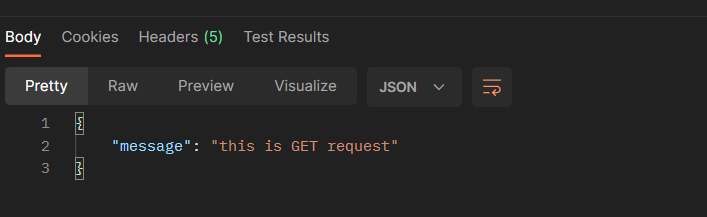